**Algoritmo K-means (Core)**

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clústeres resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.

1) Carga del Dataset:

- El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.

- Utiliza el archivo "Mall_Customers.csv" y cárgalo en tu entorno de trabajo.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

1.a) Cargando Dataset

In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

1.b) Primeros registros

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2) Selección de Variables:
- Para este análisis selecciona las variables "Annual Income(k$) y Spending Score (1-100), ya que representan características importantes relacionadas con el comportamiento de compra

2.a) Selección de los datos

In [4]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


2.b) Visualización Selección

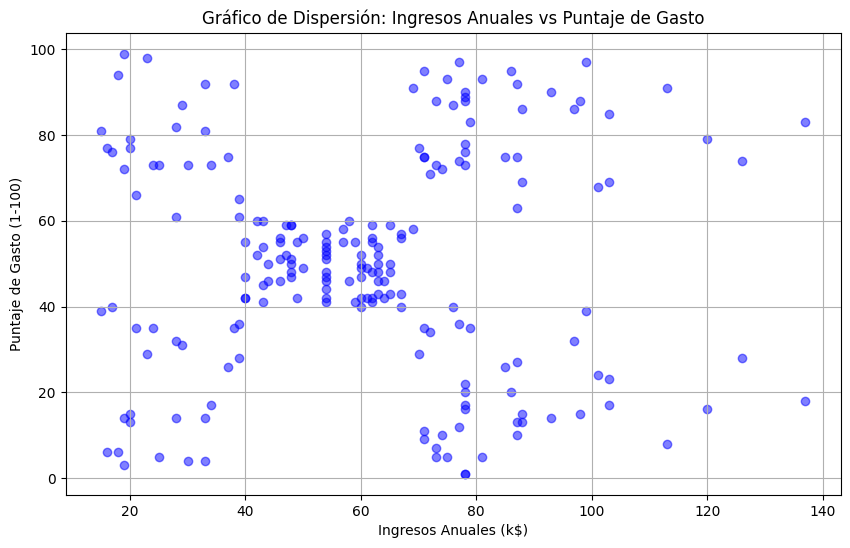

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.title('Gráfico de Dispersión: Ingresos Anuales vs Puntaje de Gasto')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')

plt.grid(True)
plt.show()

3) Implementación de K-means:
- Aplica el algoritmo K-means utilizando diferentes valores de k (por ejemplo k = 3, 4, 5) y observa cómo se agrupan los clientes
- Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides

3.a) Importar K-means

In [6]:
from sklearn.cluster import KMeans

3.b) Ejemplo simple (no core)

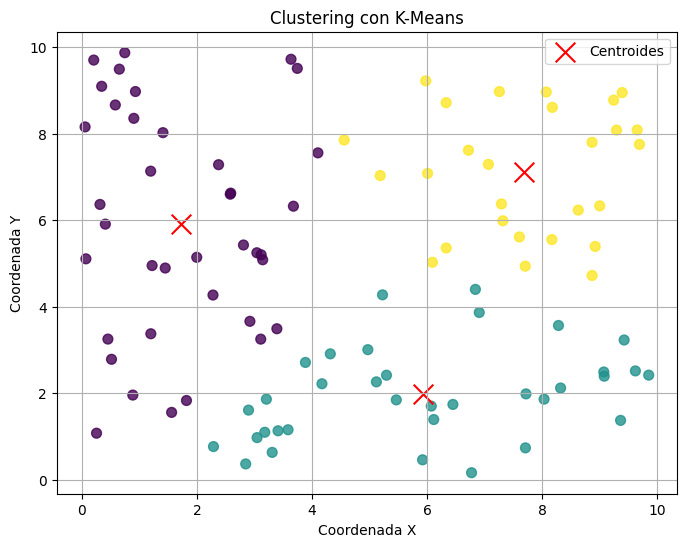

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)

X_eje = np.random.rand(100, 2) * 10  # Genera 100 puntos aleatorios en un espacio 2D

kmeans = KMeans(n_clusters=3)  # 3 grupos
kmeans.fit(X_eje)

labels = kmeans.predict(X_eje)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_eje[:, 0], X_eje[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')

plt.title("Clustering con K-Means")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")

plt.legend()
plt.grid(True)
plt.show()

3.c) Aplicar K-means con diferentes valores de K

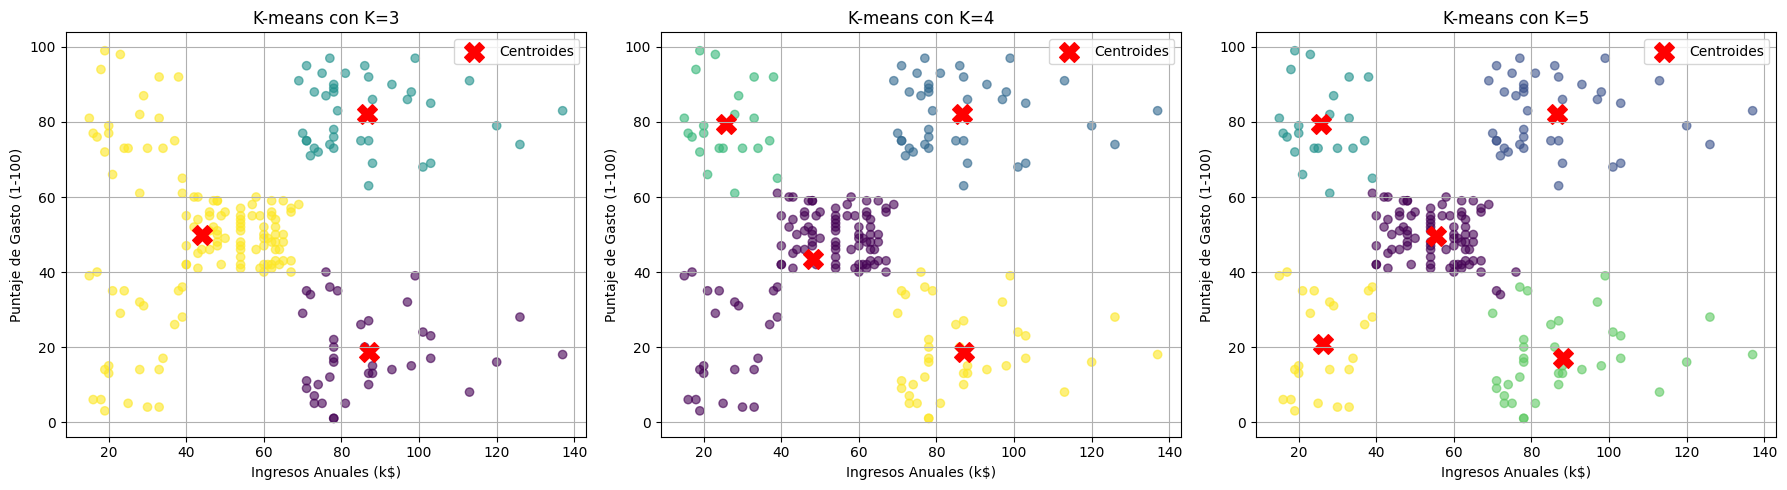

In [8]:
k_values = [3, 4, 5]
plt.figure(figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.subplot(1, 3, i + 1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

    plt.title(f'K-means con K={k}')
    plt.xlabel('Ingresos Anuales (k$)')
    plt.ylabel('Puntaje de Gasto (1-100)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

4) Elbow Method:

- Utiliza el método del codo para identificar el número óptimo de clústeres.
- Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

4.a) Calcular el SSE para diferentes valores de K

In [9]:
k_range = range(1, 11)

sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

sse

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

4.b) Graficar el método del dodo

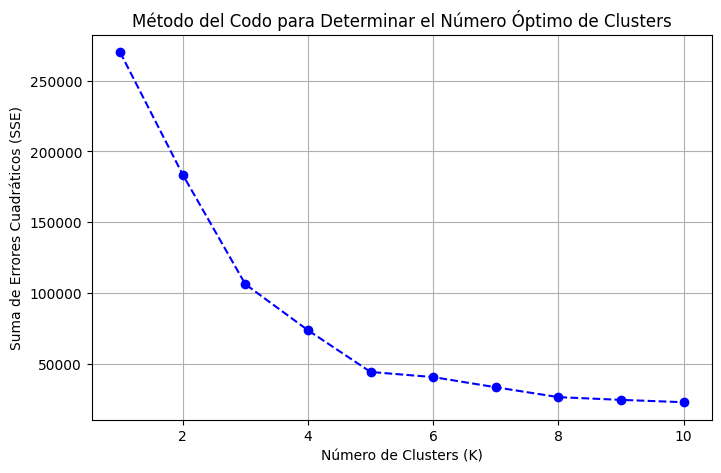

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--', color='b')

plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Suma de Errores Cuadráticos (SSE)")

plt.grid(True)
plt.show()

5) Interpretación de CLusters
- Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tiene en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

5.a) Interpretación de Clusters

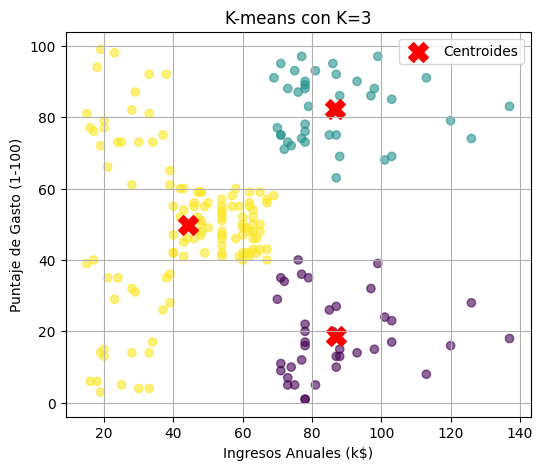

In [11]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

plt.figure(figsize=(6, 5))

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.title(f'K-means con K={k}')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')

plt.legend()
plt.grid(True)
plt.show()

K = 3:
- Cluster 1: Ingresos bajos, Jjasto bajo. Estrategia: Promociones y productos económicos.
- Cluster 2: Ingresos altos, gasto alto. Estrategia: Productos premium y programas de fidelización.
- Cluster 3: Ingresos medios, gasto medio. Estrategia: Ofertas equilibradas y relación calidad-precio.

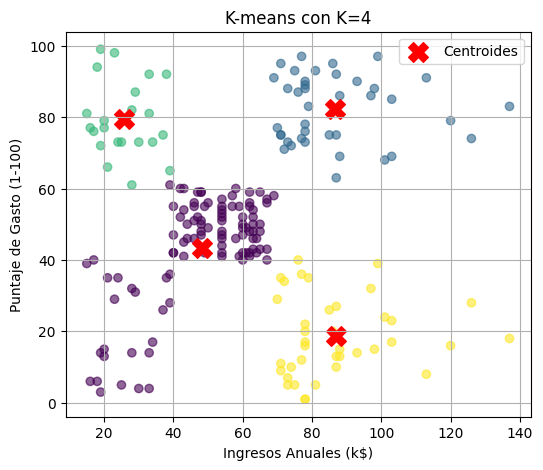

In [13]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

plt.figure(figsize=(6, 5))

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.title(f'K-means con K={k}')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')

plt.legend()
plt.grid(True)
plt.show()

K = 4:
- Cluster 1: Ingresos bajos, gasto bajo. Estrategia: Promociones agresivas.
- Cluster 2: Ingresos altos, gasto alto. Estrategia: Experiencias personalizadas.
- Cluster 3: Ingresos medios, gasto alto. Estrategia: Ofertas limitadas y productos emocionales.
- Cluster 4: Ingresos altos, gasto bajo. Estrategia: Productos de alta calidad y durabilidad.

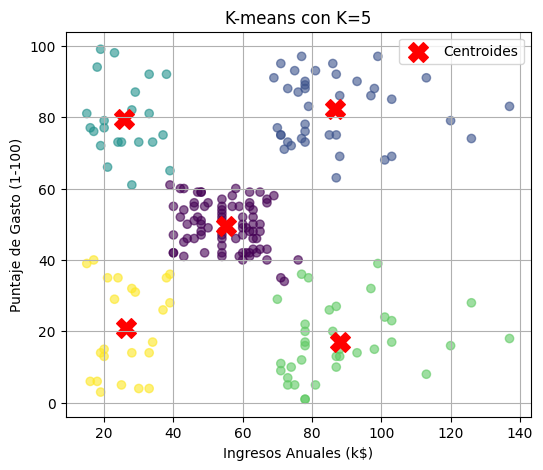

In [14]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

plt.figure(figsize=(6, 5))

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=labels, cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker="X", s=200, label="Centroides")

plt.title(f"K-means con K={k}")
plt.xlabel("Ingresos Anuales (k$)")
plt.ylabel("Puntaje de Gasto (1-100)")

plt.legend()
plt.grid(True)
plt.show()

K = 5:
- Cluster 1: Ingresos bajos, gasto bajo. Estrategia: Descuentos y productos básicos.
- Cluster 2: Ingresos altos, gasto alto. Estrategia: Productos exclusivos.
- Cluster 3: Ingresos medios, gasto medio. Estrategia: Ofertas equilibradas.
- Cluster 4: Ingresos altos, gasto bajo. Estrategia: Enfocarse en calidad y durabilidad.
- Cluster 5: Ingresos bajos, gasto alto. Estrategia: Ofertas atractivas y productos emocionales.

5.b) Estrategias de Marketing Personalizadas

- Segmentación: Ajustar productos y servicios según ingresos y hábitos de gasto.
- Promociones: Descuentos para clusters de bajo gasto, productos premium para alto gasto.
- Fidelización: Programas de recompensas para clientes con alto potencial de gasto.
- Campañas Emocionales: Apelar a emociones y estatus para clusters con alto gasto.
- Productos Económicos: Ofrecer opciones asequibles para clusters de bajos ingresos.

6) Análisis de Resultados
- Discute los resultados obtenidos
- Qué insights se pueden obtener de los grupos de clientes identificados
- Existen patrones o comportamientos comunes

6.a) Insights y Patrones comunes

- Segmentación Clave: Los clusters se dividen principalmente por ingresos anuales y puntaje de gasto.
- Clientes de Alto Valor: Altos ingresos y alto gasto. Ideales para productos premium y fidelización.
- Clientes Conservadores:Bajos ingresos y bajo gasto. Benefician de promociones y descuentos.
- Clientes con Potencial Oculto: Bajos ingresos pero alto gasto. Objetivo para campañas emocionales.
- Clientes Selectivos: Altos ingresos pero bajo gasto. Prefieren calidad y durabilidad.

6.b) Implicaciones para el negocio

- Estrategias Personalizadas: Adaptar ofertas y mensajes a cada cluster.
- Optimización de Recursos: Enfocarse en clusters rentables para maximizar ROI.
- Identificación de Oportunidades: Explorar clusters inusuales para nuevos mercados.
- Mejora de la Experiencia:Entender necesidades para aumentar satisfacción.